In [1]:
from matplotlib import pyplot as plt
from data import load_data, load_narx_data
from matplotlib import pyplot as plt
import numpy as np
import torch
from data import load_narx_data
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ExpSineSquared, Matern, Product
from scipy.sparse import csr_matrix
import time
import json

Open sparse X

In [2]:
# Define the filename
filename = 'resultsSparseX.json'

# Load the data from the JSON file
with open(filename, 'r') as file:
    resultsSparseX = json.load(file)

Open sparse XY

In [3]:
# Define the filename
filename = 'resultsSparseXY.json'

# Load the data from the JSON file
with open(filename, 'r') as file:
    resultsSparseXY = json.load(file)

Open Original

In [4]:
# Define the filename
filename = 'resultsOriginal.json'

# Load the data from the JSON file
with open(filename, 'r') as file:
    resultsOriginal = json.load(file)

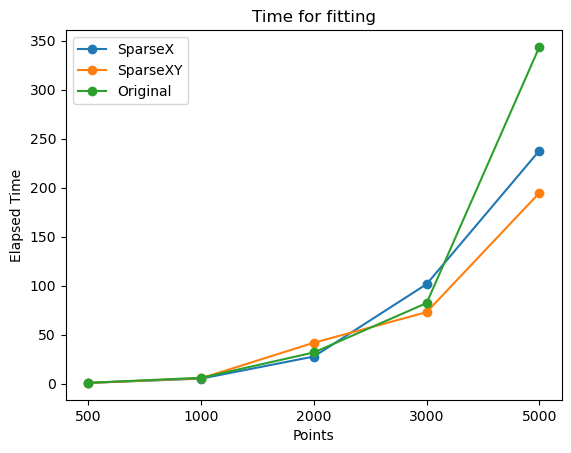

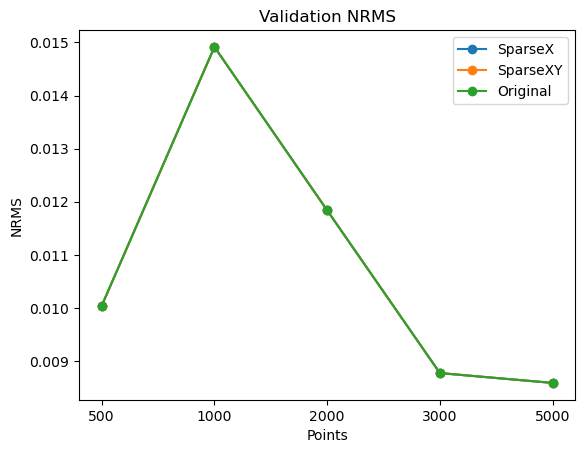

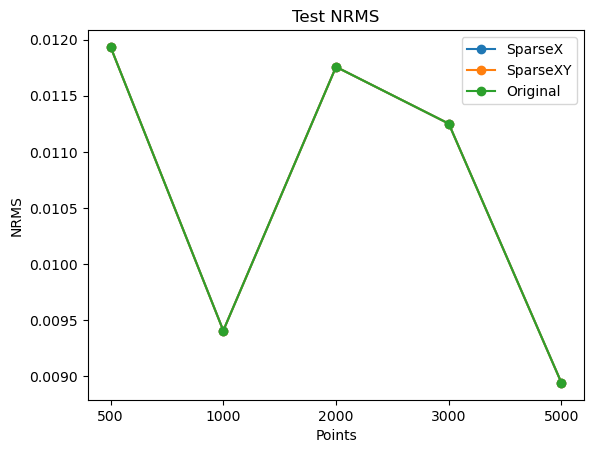

In [5]:
# Extract x values (keys) and y values (elapsed time and NRMS)
x = list(resultsSparseX.keys())
elapsed_time_sparseX = [value[0] for value in resultsSparseX.values()]
nrms_val_sparseX = [value[1] for value in resultsSparseX.values()]
nrms_test_sparseX = [value[2] for value in resultsSparseX.values()]

elapsed_time_sparseXY = [value[0] for value in resultsSparseXY.values()]
nrms_val_sparseXY = [value[1] for value in resultsSparseXY.values()]
nrms_test_sparseXY = [value[2] for value in resultsSparseXY.values()]

elapsed_time_original = [value[0] for value in resultsOriginal.values()]
nrms_val_original = [value[1] for value in resultsOriginal.values()]
nrms_test_original = [value[2] for value in resultsOriginal.values()]

# Plot 1: Elapsed Time
plt.figure(1)
plt.plot(x, elapsed_time_sparseX, marker='o', label='SparseX')
plt.plot(x, elapsed_time_sparseXY, marker='o', label='SparseXY')
plt.plot(x, elapsed_time_original, marker='o', label='Original')
plt.xlabel('Points')
plt.ylabel('Elapsed Time')
plt.title('Time for fitting')
plt.legend()

# Plot 2: NRMS validation
plt.figure(2)
plt.plot(x, nrms_val_sparseX, marker='o', label='SparseX')
plt.plot(x, nrms_val_sparseXY, marker='o', label='SparseXY')
plt.plot(x, nrms_val_original, marker='o', label='Original')
plt.xlabel('Points')
plt.ylabel('NRMS')
plt.title('Validation NRMS')
plt.legend()

# Plot 3: NRMS test
plt.figure(3)
plt.plot(x, nrms_test_sparseX, marker='o', label='SparseX')
plt.plot(x, nrms_test_sparseXY, marker='o', label='SparseXY')
plt.plot(x, nrms_test_original, marker='o', label='Original')
plt.xlabel('Points')
plt.ylabel('NRMS')
plt.title('Test NRMS')
plt.legend()

# Display the plots
plt.show()

# Approximation time

In [82]:
# Note these calculations are rough as only a limited amount of datapoints are used.
# Number of restarts of 10 is used which drastically increases the total time.
Number_of_points = 20000

Original_time = (Number_of_points/2200)**3*0.5
print(f"Original time = {Original_time:.1f} uur")

SparseX_time = (Number_of_points/1000)**2*1/6
print(f"SparseX time = {SparseX_time:.1f} uur")

SparseXY_time = (Number_of_points/1950)**2*0.5
print(f"SparseXY time = {SparseXY_time:.1f} uur")

Original time = 375.7 uur
SparseX time = 66.7 uur
SparseXY time = 52.6 uur


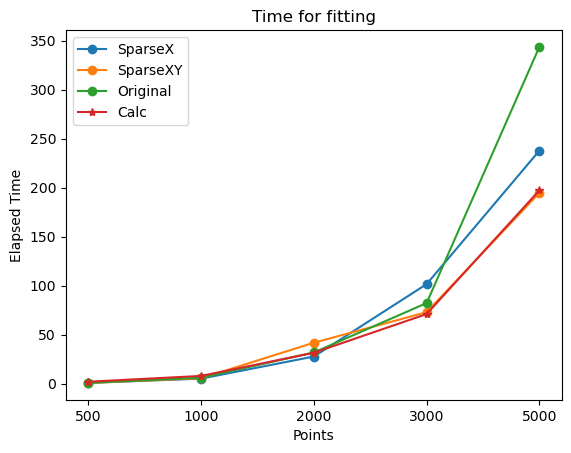

In [76]:
# Extract x values (keys) and y values (elapsed time and NRMS)
x = list(resultsSparseX.keys())
elapsed_time_sparseX = [value[0] for value in resultsSparseX.values()]

elapsed_time_sparseXY = [value[0] for value in resultsSparseXY.values()]

elapsed_time_original = [value[0] for value in resultsOriginal.values()]

# Plot 1: Elapsed Time
plt.figure(1)
plt.plot(x, elapsed_time_sparseX, marker='o', label='SparseX')
plt.plot(x, elapsed_time_sparseXY, marker='o', label='SparseXY')
plt.plot(x, elapsed_time_original, marker='o', label='Original')


tt = [(int(t)/1950)**2*30 for t in x]

plt.plot(x, tt, marker='*', label='Calc')

plt.xlabel('Points')
plt.ylabel('Elapsed Time')
plt.title('Time for fitting')
plt.legend()